# performing EDA 


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# import the dataset 

In [2]:
df = pd.read_csv("incident_event_log.csv")

In [3]:
df.shape

(141712, 36)

In [4]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [5]:
df.columns = ['number', 'incidentstate', 'active', 'reassignmentcount',
       'reopencount', 'sysmodcount', 'madesla', 'callerid', 'openedby',
       'openedat', 'syscreatedby', 'syscreatedat', 'sysupdatedby',
       'sysupdatedat', 'contacttype', 'location', 'category', 'subcategory',
       'usymptom', 'cmdbci', 'impact', 'urgency', 'priority',
       'assignmentgroup', 'assignedto', 'knowledge',
       'upriorityconfirmation', 'notify', 'problemid', 'rfc', 'vendor',
       'causedby', 'closedcode', 'resolvedby', 'resolvedat', 'closedat']

In [6]:
df.head(5)

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,madesla,callerid,openedby,openedat,...,upriorityconfirmation,notify,problemid,rfc,vendor,causedby,closedcode,resolvedby,resolvedat,closedat
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [7]:
pd.set_option("display.max_columns",None)

In [8]:
df.head(5)

,number,incidentstate,active,reassignmentcount,reopencount,sysmodcount,madesla,callerid,openedby,openedat,syscreatedby,syscreatedat,sysupdatedby,sysupdatedat,contacttype,location,category,subcategory,usymptom,cmdbci,impact,urgency,priority,assignmentgroup,assignedto,knowledge,upriorityconfirmation,notify,problemid,rfc,vendor,causedby,closedcode,resolvedby,resolvedat,closedat
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,?,2 - Medium,2 - Medium,3 - Moderate,Group 56,?,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,?,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


# finding the columns which have categorical data 

In [9]:
cat_new=df.select_dtypes(include=object)

In [10]:
cat_new.columns

Index(['number', 'incidentstate', 'callerid', 'openedby', 'openedat',
       'syscreatedby', 'syscreatedat', 'sysupdatedby', 'sysupdatedat',
       'contacttype', 'location', 'category', 'subcategory', 'usymptom',
       'cmdbci', 'impact', 'urgency', 'priority', 'assignmentgroup',
       'assignedto', 'notify', 'problemid', 'rfc', 'vendor', 'causedby',
       'closedcode', 'resolvedby', 'resolvedat', 'closedat'],
      dtype='object')

# replacing the special character '?' with nan value 

In [11]:
df.replace('?', np.nan,inplace=True)

In [12]:
df.isnull().sum()

number                        0
incidentstate                 0
active                        0
reassignmentcount             0
reopencount                   0
sysmodcount                   0
madesla                       0
callerid                     29
openedby                   4835
openedat                      0
syscreatedby              53076
syscreatedat              53076
sysupdatedby                  0
sysupdatedat                  0
contacttype                   0
location                     76
category                     78
subcategory                 111
usymptom                  32964
cmdbci                   141267
impact                        0
urgency                       0
priority                      0
assignmentgroup           14213
assignedto                27496
knowledge                     0
upriorityconfirmation         0
notify                        0
problemid                139417
rfc                      140721
vendor                   141468
causedby

# # Checking and print Unique values from each columns.

In [13]:
variable=['number', 'incidentstate', 'callerid', 'openedby', 'openedat',
       'syscreatedby', 'syscreatedat', 'sysupdatedby', 'sysupdatedat',
       'contacttype', 'location', 'category', 'subcategory', 'usymptom',
       'cmdbci', 'impact', 'urgency', 'priority', 'assignmentgroup',
       'assignedto', 'notify', 'problemid', 'rfc', 'vendor', 'causedby',
       'closedcode', 'resolvedby', 'resolvedat', 'closedat']

for variable in df:
    print ('\nFrequency of Categories for varible %s'%variable)
    print (df[variable].value_counts())
    


Frequency of Categories for varible number
INC0019396    58
INC0044260    56
INC0005927    46
INC0020718    45
INC0011206    44
              ..
INC0010559     2
INC0017966     2
INC0012327     2
INC0020006     2
INC0019918     2
Name: number, Length: 24918, dtype: int64

Frequency of Categories for varible incidentstate
Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: incidentstate, dtype: int64

Frequency of Categories for varible active
True     116726
False     24986
Name: active, dtype: int64

Frequency of Categories for varible reassignmentcount
0     69876
1     37104
2     15097
3      8274
4      4614
5      2595
6      1447
7       985
8       574
9       365
10      285
11      174
12      108
13       61
14       45
15       21
17       16
20       16
16       13
18  

# EDA visualization 

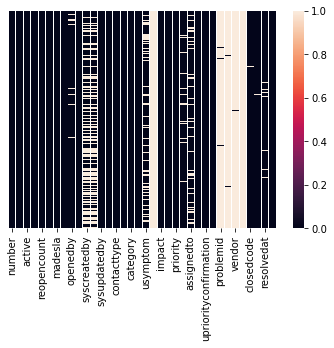

In [14]:
# Heatmap for missing values

colours= ["#000099","#ffff00"]
sns.heatmap(df.isnull(),yticklabels=False)

In [15]:
import dtale

In [16]:
dtale.show(df)

In [17]:
for col_name in df.columns: 
    print ("column:",col_name,".Missing:",sum(df[col_name].isnull()))

column: number .Missing: 0
column: incidentstate .Missing: 0
column: active .Missing: 0
column: reassignmentcount .Missing: 0
column: reopencount .Missing: 0
column: sysmodcount .Missing: 0
column: madesla .Missing: 0
column: callerid .Missing: 29
column: openedby .Missing: 4835
column: openedat .Missing: 0
column: syscreatedby .Missing: 53076
column: syscreatedat .Missing: 53076
column: sysupdatedby .Missing: 0
column: sysupdatedat .Missing: 0
column: contacttype .Missing: 0
column: location .Missing: 76
column: category .Missing: 78
column: subcategory .Missing: 111
column: usymptom .Missing: 32964
column: cmdbci .Missing: 141267
column: impact .Missing: 0
column: urgency .Missing: 0
column: priority .Missing: 0
column: assignmentgroup .Missing: 14213
column: assignedto .Missing: 27496
column: knowledge .Missing: 0
column: upriorityconfirmation .Missing: 0
column: notify .Missing: 0
column: problemid .Missing: 139417
column: rfc .Missing: 140721
column: vendor .Missing: 141468
column

# droping the columns which have more than 50 % of missing data 
As We can Observe From above Visualisation and value counts data, Features 'problemid', 'rfc','vendor','causedby, and 'cmdbci' are having very high no. of Missing values so we will exclude these features from further analysis. These features add no value to our data analysis.